In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def solve_orbit(phi, y):
    u, u_prime = y[0: 2]
    
    du_dphi = u_prime
    du2_dphi2 = 3*u**2-u

    return [du_dphi, du2_dphi2]

def ini_condition(u_ini, b):
    u_prime_ini = np.sqrt(1/b**2-u_ini**2*(1-2*u_ini))

    return [u_ini, u_prime_ini]


In [3]:
b = [5, 3*np.sqrt(3), 10, 15, 20]
r_ini = 50
u_ini = 1/r_ini
phi_end = [np.pi*2, np.pi*4, np.pi/1.1, np.pi/1.1, np.pi/1.1]
phi_rng = [[np.arcsin(b[i]/r_ini), phi_end[i]] for i in range(len(b))]
y_ini = [ini_condition(u_ini, b[i]) for i in range(len(b))]

In [4]:
x_list = []
y_list = []

In [5]:
for i in range(len(b)):
    sol = solve_ivp(solve_orbit, phi_rng[i], y_ini[i], dense_output=True, atol=1e-9, rtol=1e-7)
    phi_list = np.linspace(phi_rng[i][0], phi_rng[i][-1], 10*len(sol.t))
    u_list = sol.sol(phi_list)[0]
    r_list = 1/u_list
    x_list.append(r_list*np.cos(phi_list))
    y_list.append(r_list*np.sin(phi_list))

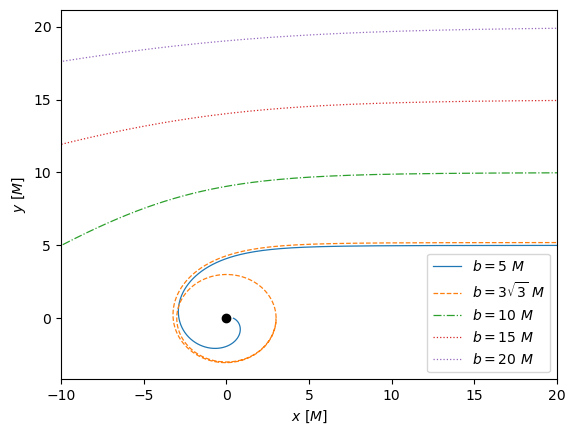

In [6]:
plt.plot(x_list[0], y_list[0], lw=0.9, label=r'$b={}\ M$'.format(b[0]))
plt.plot(x_list[1], y_list[1], lw=0.9, linestyle = '--', label=r'$b=3\sqrt{3}\ M$')
plt.plot(x_list[2], y_list[2], lw=0.9, linestyle = '-.', label=r'$b={}\ M$'.format(b[2]))
plt.plot(x_list[3], y_list[3], lw=0.9, linestyle = ':', label=r'$b={}\ M$'.format(b[3]))
plt.plot(x_list[4], y_list[4], lw=0.9, linestyle = ':', label=r'$b={}\ M$'.format(b[4]))

plt.scatter(0, 0, color='black')
plt.legend()
plt.xlim(-10,20)
plt.xlabel(r'$x\ [M]$')
plt.ylabel(r'$y\ [M]$')
plt.show()